In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import *
from datetime import datetime
from datetime import timedelta

In [17]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df['login_time'].iloc[0]

Timestamp('1970-01-01 20:13:18')

In [6]:
df['login_time'].iloc[-1]

Timestamp('1970-04-13 18:54:23')

In [18]:
df['count'] = 1
df.set_index('login_time' , inplace= True)
logins = df.resample('15T' ).sum()

In [23]:
logins['time'] = pd.to_datetime(logins.index)

In [24]:
logins['year'] = logins.time.dt.year
logins['month'] = logins.time.dt.month
logins['day_of Month'] = logins.time.dt.day
logins['hour'] = logins.time.dt.hour
logins['minute'] = logins.time.dt.minute
logins['week'] = logins.time.dt.week
logins['day_name'] =logins.time.dt.day_name()
logins['weekend'] = 0
logins.loc[(logins['day_name'] == 'Saturday') | (logins['day_name'] == 'Sunday'), 'weekend'] = 1

In [25]:
logins.head()

,count,time,year,month,day_of Month,hour,minute,week,day_name,weekend
login_time,,,,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1970,1,1,20,0,1,Thursday,0
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1970,1,1,20,15,1,Thursday,0
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1970,1,1,20,30,1,Thursday,0
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1970,1,1,20,45,1,Thursday,0
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1970,1,1,21,0,1,Thursday,0


In [150]:
logins[['day_name' , 'count']].groupby('day_name').sum()

,count
day_name,
Friday,15208
Monday,8823
Saturday,19377
Sunday,18167
Thursday,11960
Tuesday,9268
Wednesday,10339


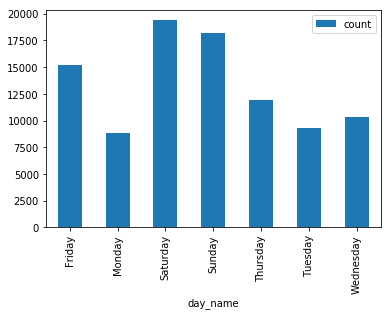

In [27]:
logins[['day_name' , 'count']].groupby('day_name').sum().plot(kind = 'bar')

In [330]:
daily_login = logins.resample('D').sum()

In [314]:
daily_login['date'] = pd.to_datetime(daily_login.index) 
daily_login['day_name'] = daily_login.date.dt.day_name()

In [315]:
daily_login.head()

,count,year,month,day_of Month,hour,minute,week,weekend,date,day_name
login_time,,,,,,,,,,
1970-01-01,112,31520,16,16,344,360,16,0,1970-01-01,Thursday
1970-01-02,681,189120,96,192,1104,2160,96,0,1970-01-02,Friday
1970-01-03,793,189120,96,288,1104,2160,96,96,1970-01-03,Saturday
1970-01-04,788,189120,96,384,1104,2160,96,96,1970-01-04,Sunday
1970-01-05,459,189120,96,480,1104,2160,192,0,1970-01-05,Monday


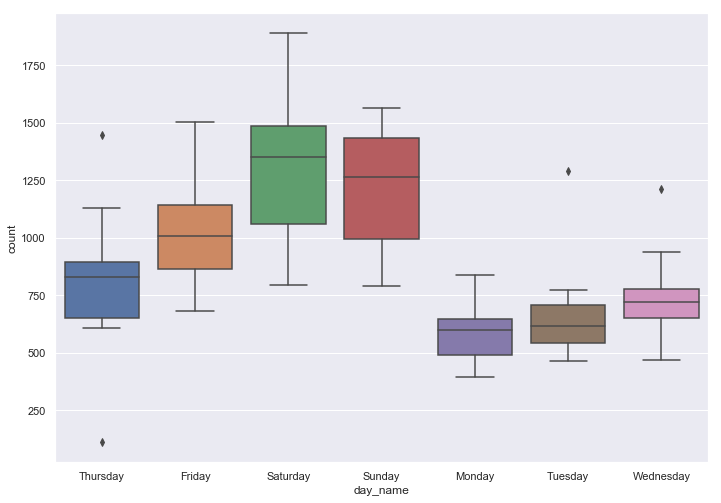

In [316]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = daily_login , y = 'count', x= 'day_name')

In [321]:
logins.pivot_table( values= ['hour'],index=['week' ] , columns= ['day_name'] , aggfunc='count').describe().head(1)

hour                                                  
day_name Friday Monday Saturday Sunday Thursday Tuesday Wednesday
count      15.0   15.0     15.0   15.0     15.0    14.0      14.0

In [306]:
no_weeks = {'Friday' : 15 , 'Monday' : 15 , 'Saturday': 15 , 'Sunday' : 15 , 'Thursday': 14 , 'Tuesday' : 14 , 'Wednesday': 14}

In [324]:
test = logins.pivot_table(values='count' , index= 'day_name' , aggfunc= 'sum')
test.T

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,15208,8823,19377,18167,11960,9268,10339


In [325]:
daily_login = [t for t in test['count']]
weeks = [n for n in no_weeks.values()]

test['daily_avg'] = [round(x/y, 2) for x, y in zip(daily_login, weeks)]

In [327]:
test.T

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,15208.00,8823.0,19377.0,18167.00,11960.00,9268.0,10339.0
daily_avg,1013.87,588.2,1291.8,1211.13,854.29,662.0,738.5


<BarContainer object of 7 artists>

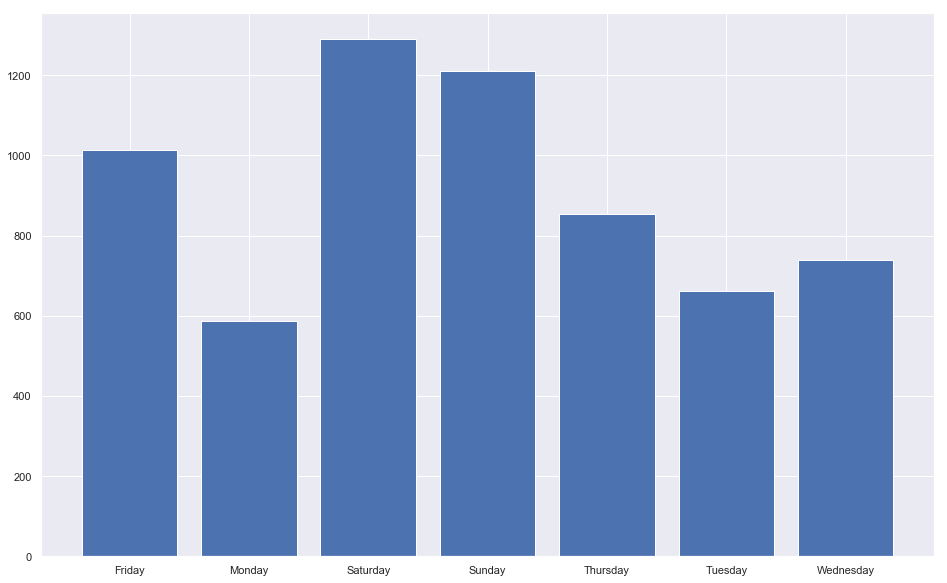

In [311]:
plt.figure(figsize=(16 , 10))
plt.bar(height= test['daily_avg'] , x = test.index)

**The data set is uneven. There are more samples for Saturdays, Sundays, Fridays and Mondays than the rest of the week. That means just looking at the total number of logins is not enough, inorder to compare the login volume through out the week we need to go one step further and calculate the average for each day of the week. Fortunately in this case Daily Average and total graph show the same thing: Saturdays, Sundays and Fridays have the highest number of logins. That can help us to distribute our resources efficiently through out the week.**

# checking monthly rate

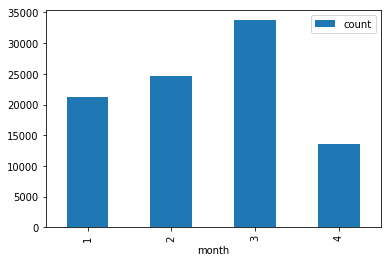

In [47]:
logins[['month' , 'count']].groupby('month').sum().plot(kind = 'bar')

In [49]:
logins.resample('m').count()

,count,time,year,month,day_of Month,hour,minute,week,day_name,weekend
login_time,,,,,,,,,,
1970-01-31,2896,2896,2896,2896,2896,2896,2896,2896,2896,2896
1970-02-28,2688,2688,2688,2688,2688,2688,2688,2688,2688,2688
1970-03-31,2976,2976,2976,2976,2976,2976,2976,2976,2976,2976
1970-04-30,1228,1228,1228,1228,1228,1228,1228,1228,1228,1228


In [91]:
logins.month_name[logins.month == 1] = 'January'
logins.month_name[logins.month == 2] = 'Febuary'
logins.month_name[logins.month == 3] = 'March'
logins.month_name[logins.month == 4] = 'April'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-p

In [104]:
logins[[ 'month_name', 'day_of Month']].groupby(['month_name']).count()

,day_of Month
month_name,
April,1228
Febuary,2688
January,2896
March,2976


In [117]:
no_logs_month = logins[[ 'month_name', 'day_of Month']].groupby(['month_name']).count()

In [114]:
logins['day_of Month'].value_counts()
logins.pivot_table(values= 'hour' , index= 'day_of Month' , columns= 'month_name', aggfunc= 'count').describe()

month_name,April,Febuary,January,March
count,13.0,28.0,31.0,31.0


In [283]:
monthly_data = logins.pivot_table(values= 'hour' , index= 'day_of Month' , columns= 'month_name', aggfunc= 'count').describe().T

In [284]:
monthly_data

,count,mean,std,min,25%,50%,75%,max
month_name,,,,,,,,
April,13.0,94.461538,5.547002,76.0,96.0,96.0,96.0,96.0
Febuary,28.0,96.000000,0.000000,96.0,96.0,96.0,96.0,96.0
January,31.0,93.419355,14.368424,16.0,96.0,96.0,96.0,96.0
March,31.0,96.000000,0.000000,96.0,96.0,96.0,96.0,96.0


In [286]:
monthly_data['mean']

month_name
April      94.461538
Febuary    96.000000
January    93.419355
March      96.000000
Name: mean, dtype: float64

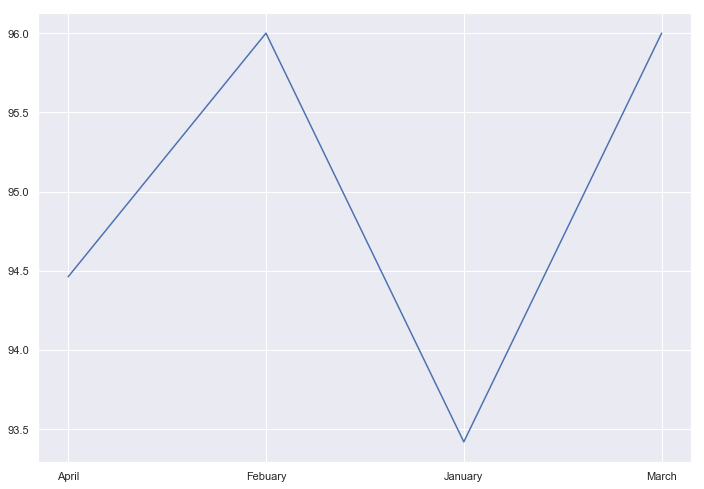

In [288]:
month = ['April','Febuary','January','March']
plt.plot(month, monthly_data['mean'] )

**The overall number of logins in April were significantly less than other month. That was predictable since we only collected data for 13 day in April. Comparing the daily average of logins for each month shows Juanuary had a least average logins compare of to other months.**

# Checking Hourly Login rate

In [332]:
hourly_avg = logins.resample('H').sum()
hourly_avg['time'] = pd.to_datetime(hourly_avg.index)
hourly_avg['hour'] = hourly_avg.time.dt.hour
hourly_avg['day_name'] = hourly_avg.time.dt.day_name()

In [333]:
hourly_avg.head()

,count,year,month,day_of Month,hour,minute,week,weekend,time,day_name
login_time,,,,,,,,,,
1970-01-01 20:00:00,24,7880,4,4,20,90,4,0,1970-01-01 20:00:00,Thursday
1970-01-01 21:00:00,9,7880,4,4,21,90,4,0,1970-01-01 21:00:00,Thursday
1970-01-01 22:00:00,21,7880,4,4,22,90,4,0,1970-01-01 22:00:00,Thursday
1970-01-01 23:00:00,58,7880,4,4,23,90,4,0,1970-01-01 23:00:00,Thursday
1970-01-02 00:00:00,53,7880,4,8,0,90,4,0,1970-01-02 00:00:00,Friday


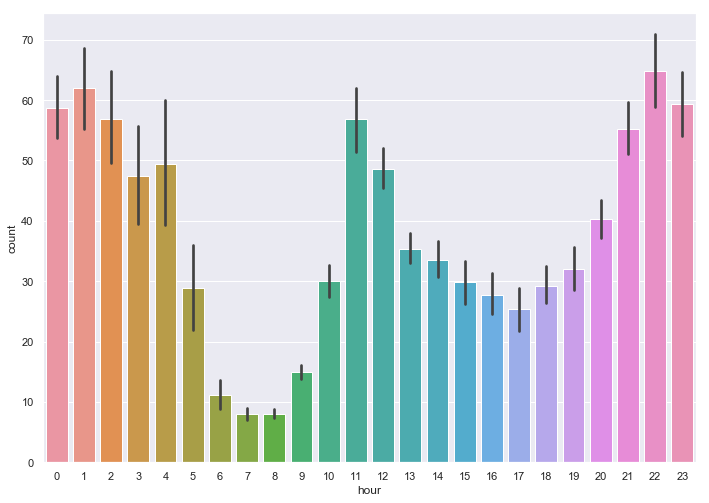

In [203]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = hourly_avg , y = 'count', x= 'hour')

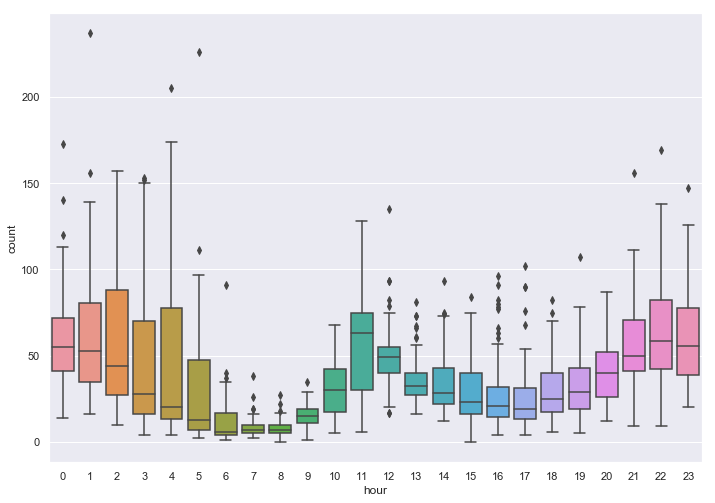

In [202]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data = hourly_avg , y = 'count', x= 'hour')

In [341]:
weekday_hourly_avg = hourly_avg.pivot_table(columns= 'day_name' , values='count' , index='hour', aggfunc='sum').T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,975,957,771,502,353,245,121,105,109,240,...,522,390,372,480,577,658,803,1206,1519,1298
Monday,531,414,312,236,206,121,66,111,147,256,...,337,293,249,238,267,262,376,605,611,532
Saturday,1254,1562,1608,1574,1719,1093,408,178,127,118,...,765,763,718,641,638,684,702,874,1162,1006
Sunday,1123,1355,1608,1647,2107,1102,382,192,153,180,...,786,802,818,618,557,632,612,625,583,557
Thursday,816,777,625,375,255,136,67,81,95,251,...,388,280,242,232,351,392,622,870,1089,1033
Tuesday,607,566,394,198,149,113,46,64,88,242,...,309,247,219,183,303,301,488,704,758,724
Wednesday,687,686,482,299,245,135,48,84,99,240,...,319,263,214,192,287,306,500,739,885,908


In [390]:
weekday_hourly_avg.T.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

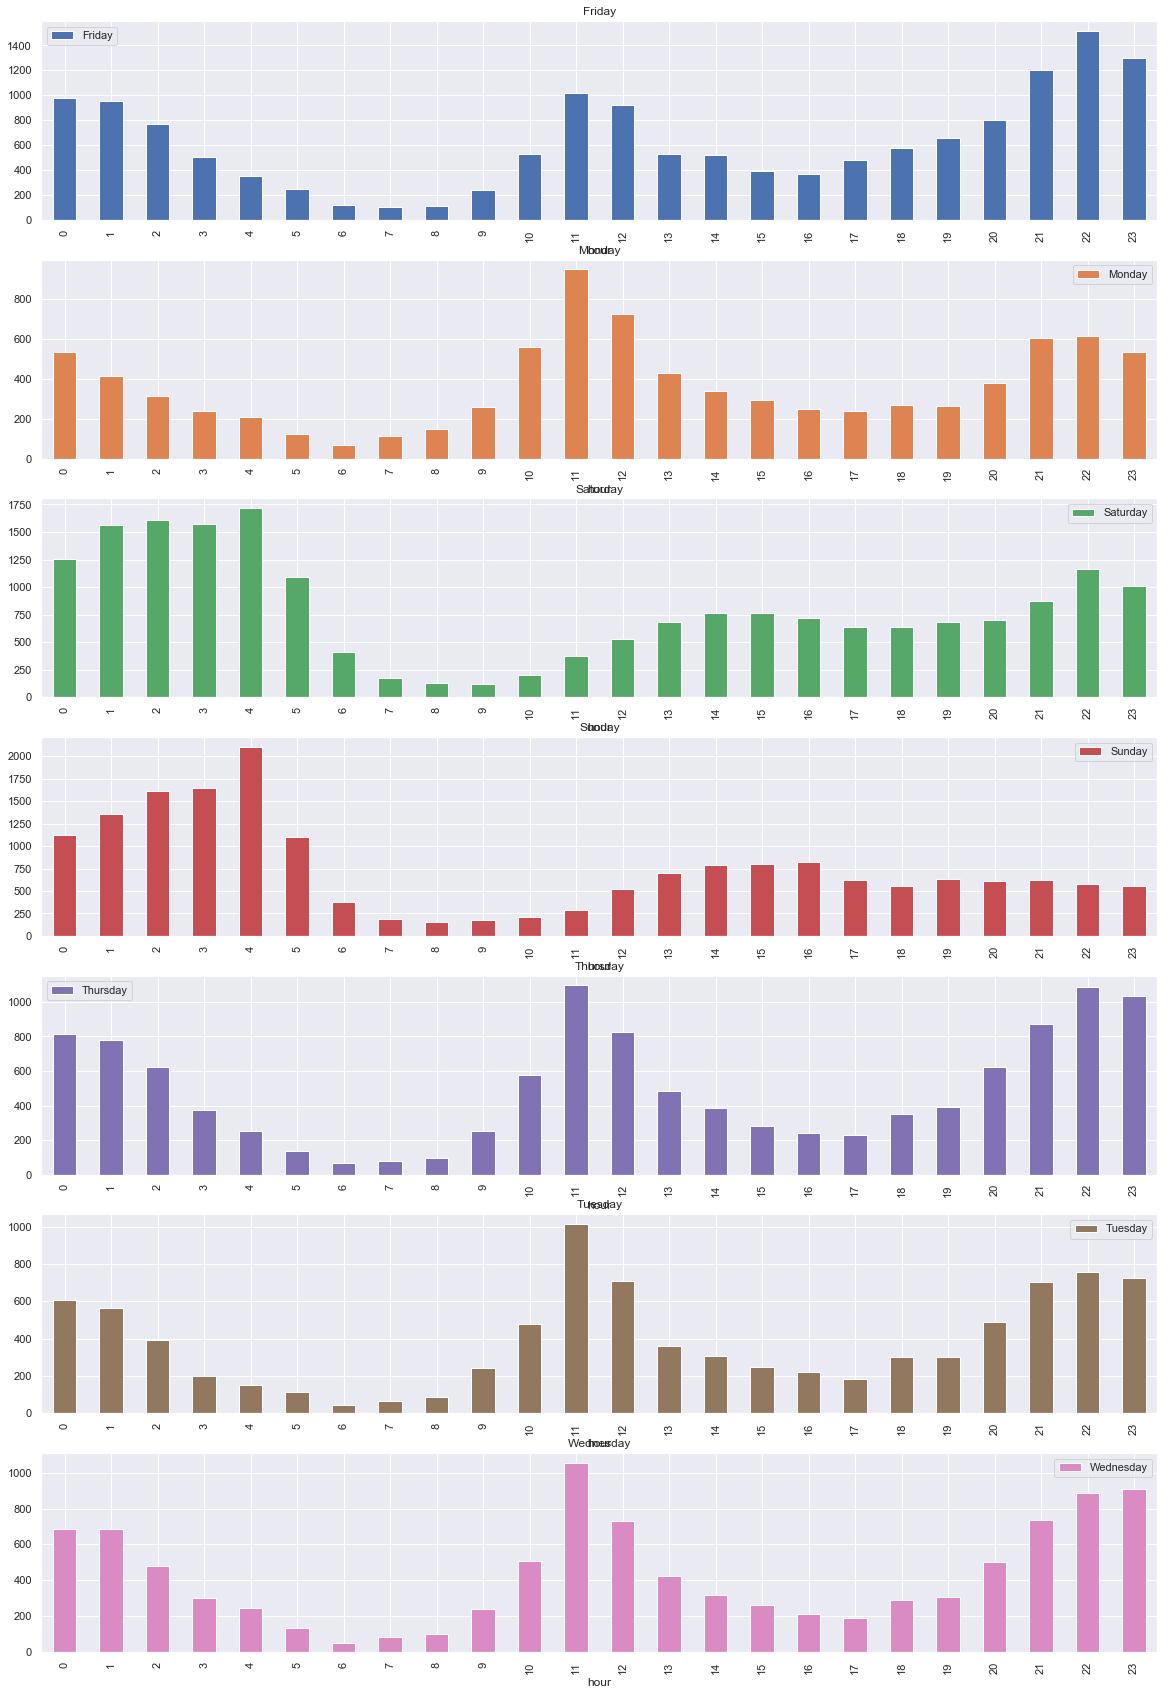

In [453]:
_ = weekday_hourly_avg.T.plot(kind = 'bar' , figsize = (20, 30) , xticks = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23] , subplots = True , sharex= False)

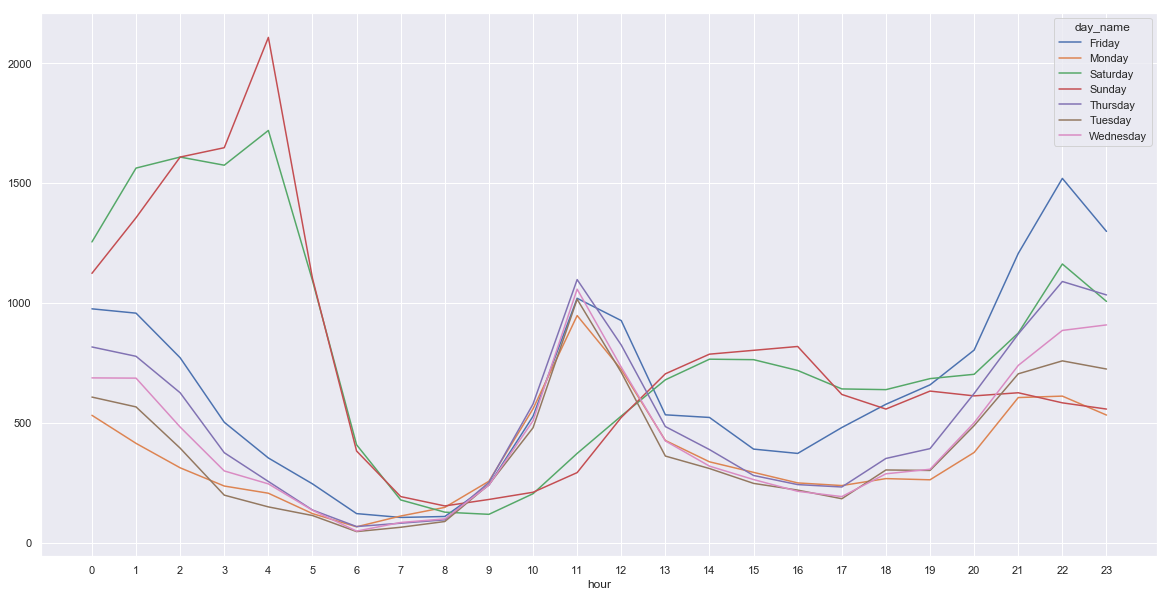

In [456]:
_ = weekday_hourly_avg.T.plot(kind = 'line' , figsize = (20, 10) , xticks = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23] )

**Comparing hourly distribution of logins for each day, tells us:**

**1- There are different patterns of activities for weekdays and weekends. During the week, between 10am- 1pm we see high volume of loggings whereas weekends are rather slow during that time frame and start picking up at 2pm.** 

**2- Common pattern between weekends and weekdays is high volume of logins between 10pm and 5am of the following day. The slowest time of the day for all days is between 6am and 10am.**   

# These information can help us to distribute our resources more efficiently:

**1- We clearly need more resources between Friday 9pm - Saturday 5am and Saturday 9pm - Sunday 5am**

**2- Less Resourcess on weekends between 6am and 2pm and weekdays between 4am and 10am.**

# Data quality issues:
**Incomplete Time cycles:**

**Incomplete month: April data is only contaned 13 days.**

**Incomplete weeks: It started on Thursday 8pm and ended on Monday 6pm, that leaves with 14 complete weeks and half a week between Thurdsay and Monday.**

**Incomplete hours: We don't have complete 24hours data collected for everyday. The first and the last days of the dataset are not full 24hrs days.**